# 数据加载与检查
 
 本单元用于加载和检查MBPP数据集的两个版本：
 - mbpp.jsonl: 原始JSONL格式数据集（每行一个JSON对象）
 - sanitized-mbpp.json: 清洗后的标准JSON格式数据集
 
这些数据集包含编程问题描述和对应的代码解决方案，将用于embedding模型的训练。

In [5]:
# 从本地文件加载 MBPP 数据（不使用 datasets 库）
import json
import os
from pprint import pprint

jsonl_path = "./mbpp.jsonl"
json_path = "./sanitized-mbpp.json"

for p in (jsonl_path, json_path):
    print(f"检查文件: {p} -> {'存在' if os.path.exists(p) else '未找到'}")

# 加载 jsonl（每行一个 JSON）
def load_jsonl(path):
    items = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            line = line.strip()
            if not line:
                continue
            try:
                items.append(json.loads(line))
            except Exception as e:
                print(f"解析 {path} 第 {i} 行失败：", type(e).__name__, e)
    return items

# 加载普通 json 文件
def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

mbpp = []
sanitized = []

if os.path.exists(jsonl_path):
    mbpp = load_jsonl(jsonl_path)
    print(f"已加载 mbpp.jsonl，样本数={len(mbpp)}")
else:
    print("未找到 mbpp.jsonl，mbpp 列表为空")

if os.path.exists(json_path):
    try:
        sanitized = load_json(json_path)
        print(f"已加载 sanitized-mbpp.json，样本数={len(sanitized)}")
    except Exception as e:
        print("加载 sanitized-mbpp.json 失败：", type(e).__name__, e)
else:
    print("未找到 sanitized-mbpp.json，sanitized 列表为空")

# 打印第一条示例（如果存在）
if mbpp:
    print('\n--- mbpp.jsonl 第一条示例（部分） ---')
    pprint(mbpp[0])
if sanitized:
    print('\n--- sanitized-mbpp.json 第一条示例（部分） ---')
    pprint(sanitized[0])

# 将加载的数据放到全局变量，方便 notebook 后续使用
loaded_mbpp = mbpp
loaded_sanitized = sanitized
print('\n可用变量: loaded_mbpp, loaded_sanitized')

检查文件: ./mbpp.jsonl -> 存在
检查文件: ./sanitized-mbpp.json -> 存在
已加载 mbpp.jsonl，样本数=974
已加载 sanitized-mbpp.json，样本数=427

--- mbpp.jsonl 第一条示例（部分） ---
{'challenge_test_list': [],
 'code': 'R = 3\r\n'
         'C = 3\r\n'
         'def min_cost(cost, m, n): \r\n'
         '\ttc = [[0 for x in range(C)] for x in range(R)] \r\n'
         '\ttc[0][0] = cost[0][0] \r\n'
         '\tfor i in range(1, m+1): \r\n'
         '\t\ttc[i][0] = tc[i-1][0] + cost[i][0] \r\n'
         '\tfor j in range(1, n+1): \r\n'
         '\t\ttc[0][j] = tc[0][j-1] + cost[0][j] \r\n'
         '\tfor i in range(1, m+1): \r\n'
         '\t\tfor j in range(1, n+1): \r\n'
         '\t\t\ttc[i][j] = min(tc[i-1][j-1], tc[i-1][j], tc[i][j-1]) + '
         'cost[i][j] \r\n'
         '\treturn tc[m][n]',
 'task_id': 1,
 'test_list': ['assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5, 3]], 2, 2) == 8',
               'assert min_cost([[2, 3, 4], [5, 9, 3], [2, 6, 4]], 2, 2) == 12',
               'assert min_cost([[3, 4, 5], [6, 10, 4

# 安装依赖
pip install torch transformers sentence-transformers numpy matplotlib tqdm scipy scikit-learn

## 数据集格式说明



### 1) `mbpp.jsonl`（每行一个 JSON）
- 说明：原始或完整版本，每行保存一条样本（JSONL）。常见字段：
  - `source_file` (可选)：来源文件名
  - `task_id`：任务编号（整数）
  - `text` 或 `prompt`：题目描述（字符串）
  - `code`：参考/标准答案代码（字符串）
  - `test_imports`：测试所需的 import 语句列表（可选）
  - `test_list`：测试断言列表（字符串数组），通常为可直接执行的 `assert ...` 文本
  - `test_setup_code`：运行测试前需执行的准备代码（可选）
  - `challenge_test_list`：扩展/挑战测试（可选）

示例（单行 JSON，已格式化以便阅读，实际文件为 JSONL）：

```json
{
  "source_file": "Benchmark Questions Verification V2.ipynb",
  "task_id": 1,
  "text": "Write a function to find the minimum cost path to reach (m, n) from (0, 0) ...",
  "code": "def min_cost(cost, m, n): ... return tc[m][n]",
  "test_setup_code": "",
  "test_list": [
    "assert min_cost([[1,2,3],[4,8,2],[1,5,3]],2,2) == 8",
    "assert min_cost([[2,3,4],[5,9,3],[2,6,4]],2,2) == 12"
  ],
  "challenge_test_list": []
}
```

---

### 2) `sanitized-mbpp.json`（标准 JSON，整个文件为一个 JSON 数组）
- 说明：经过清洗/规范化后的版本，通常以数组形式保存所有样本。字段与 `mbpp.jsonl` 类似，常见字段有：
  - `task_id`：任务编号
  - `prompt` 或 `text`：题目描述
  - `code`：参考代码
  - `test_imports`：测试所需 imports（数组）
  - `test_list`：测试断言数组

示例（数组中的一个对象）：

```json
{
  "task_id": 2,
  "prompt": "Write a function to find the shared elements from the given two lists.",
  "code": "def similar_elements(test_tup1, test_tup2):\n  res = tuple(set(test_tup1) & set(test_tup2))\n  return (res)",
  "test_imports": [],
  "test_list": [
    "assert set(similar_elements((3,4,5,6),(5,7,4,10))) == set((4,5))",
    "assert set(similar_elements((1,2,3,4),(5,4,3,7))) == set((3,4))"
  ]
}
```

In [6]:
# 将 sanitized-mbpp.json 或 mbpp.jsonl -> mbpp_train.jsonl / mbpp_val.jsonl，按 8:2 划分
import json, os, random

mbpp_jsonl = "./mbpp.jsonl"
sanitized_json = "./sanitized-mbpp.json"
out_train = "./mbpp_train.jsonl"
out_val = "./mbpp_val.jsonl"

# 划分配置：8:2 (train:val)
TRAIN_RATIO = 0.8
VAL_RATIO = 0.2
SEED = 42


def load_jsonl(path):
    items = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            line = line.strip()
            if not line:
                continue
            try:
                items.append(json.loads(line))
            except Exception as e:
                print(f"解析 {path} 第 {i} 行失败：", type(e).__name__, e)
    return items


# 优先使用 sanitized_json（已清洗），否则尝试使用 mbpp_jsonl
items = []
if os.path.exists(sanitized_json):
    try:
        with open(sanitized_json, 'r', encoding='utf-8') as f:
            items = json.load(f)
        print(f"已加载 sanitized json，样本数={len(items)}")
    except Exception as e:
        print("加载 sanitized-mbpp.json 失败：", type(e).__name__, e)

if not items and os.path.exists(mbpp_jsonl):
    print(f"sanitized 未提供，尝试加载 jsonl: {mbpp_jsonl}")
    items = load_jsonl(mbpp_jsonl)
    print(f"已加载 mbpp.jsonl，样本数={len(items)}")

print(f"总候选样本数: {len(items)}")

if len(items) == 0:
    print('未找到可用样本，未写入 train/val 文件')
else:
    # 随机打乱并按比例划分（可复现）
    random.seed(SEED)
    random.shuffle(items)

    n = len(items)
    train_n = int(n * TRAIN_RATIO)
    val_n = n - train_n

    train_items = items[:train_n]
    val_items = items[train_n:]

    print(f"划分结果: total={n}, train={len(train_items)}, val={len(val_items)} (目标 8:2)")

    # 写出文件（每行 JSON）
    with open(out_train, 'w', encoding='utf-8') as f_train, open(out_val, 'w', encoding='utf-8') as f_val:
        for item in train_items:
            query = item.get('prompt') or item.get('text') or item.get('task') or ""
            pos_doc = item.get('code') or item.get('solution') or ""
            if query and pos_doc:
                f_train.write(json.dumps({"query": query, "pos_doc": pos_doc, "meta": {"task_id": item.get("task_id")}}, ensure_ascii=False) + "\n")
        for item in val_items:
            query = item.get('prompt') or item.get('text') or item.get('task') or ""
            pos_doc = item.get('code') or item.get('solution') or ""
            if query and pos_doc:
                f_val.write(json.dumps({"query": query, "pos_doc": pos_doc, "meta": {"task_id": item.get("task_id")}}, ensure_ascii=False) + "\n")

    print(f"写入完成: train -> {out_train}, val -> {out_val}")

已加载 sanitized json，样本数=427
总候选样本数: 427
划分结果: total=427, train=341, val=86 (目标 8:2)
写入完成: train -> ./mbpp_train.jsonl, val -> ./mbpp_val.jsonl


# 数据预处理与划分
 
 本单元将原始MBPP数据集转换为训练和验证集格式：
 - 从sanitized-mbpp.json或mbpp.jsonl加载数据
 - 按8:2比例随机划分为训练集和验证集
 - 将数据转换为query-pos_doc对格式，便于embedding模型训练
 - 保存为JSONL格式文件：mbpp_train.jsonl和mbpp_val.jsonl

In [ ]:
# 完整训练单元（放在 notebook 中运行）
# 说明：本单元实现了基于 in-batch negatives 的嵌入微调流程，支持 fp16（AMP）和梯度累积。
# 在运行之前，请确保已生成训练文件：./mbpp_train.jsonl
import os
# 设置tokenizers并行ism以避免DataLoader多进程警告
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import json
from functools import partial
from pprint import pprint

import random
import numpy as np

import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, get_cosine_schedule_with_warmup
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm


# --------------------------- 数据集类 ---------------------------
class JsonlDataset(Dataset):
    def __init__(self, path):
        assert os.path.exists(path), f"训练文件不存在: {path}"
        self.samples = []
        with open(path, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                line = line.strip()
                if not line:
                    continue
                try:
                    self.samples.append(json.loads(line))
                except Exception as e:
                    print(f"解析第 {i} 行失败:", e)
        if len(self.samples) == 0:
            raise ValueError("未在训练文件中读取到样本，请检查文件内容")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

# --------------------------- collate_fn ---------------------------
def collate_fn(batch, tokenizer, query_max_len, passage_max_len):
    queries = [item.get('query') or item.get('prompt') or item.get('text') or '' for item in batch]
    pos_docs = [item.get('pos_doc') or item.get('code') or '' for item in batch]
    # tokenizer 输出为 torch tensors
    q = tokenizer(queries, padding=True, truncation=True, max_length=query_max_len, return_tensors='pt')
    p = tokenizer(pos_docs, padding=True, truncation=True, max_length=passage_max_len, return_tensors='pt')
    return {
        'query_input_ids': q['input_ids'],
        'query_attention_mask': q['attention_mask'],
        'pos_doc_input_ids': p['input_ids'],
        'pos_doc_attention_mask': p['attention_mask']
    }

# --------------------------- 模型封装 ---------------------------
class EmbeddingModel(nn.Module):
    def __init__(self, model_name_or_path, temperature=0.02):
        super().__init__()
        # 使用 SentenceTransformer 封装底层模型以获取 sentence_embedding
        self.s2 = SentenceTransformer(model_name_or_path, trust_remote_code=True)
        self.temperature = temperature

    def forward(self, query_input_ids, query_attention_mask, pos_doc_input_ids, pos_doc_attention_mask):
        # SentenceTransformer 接受 dict 输入并返回字典包含 'sentence_embedding'
        q_emb = self.s2({'input_ids': query_input_ids, 'attention_mask': query_attention_mask})['sentence_embedding']
        p_emb = self.s2({'input_ids': pos_doc_input_ids, 'attention_mask': pos_doc_attention_mask})['sentence_embedding']

        q_emb = F.normalize(q_emb, p=2, dim=-1)
        p_emb = F.normalize(p_emb, p=2, dim=-1)

        sim = q_emb @ p_emb.t() / self.temperature
        labels = torch.arange(sim.size(0), device=sim.device, dtype=torch.long)
        loss = F.cross_entropy(sim, labels)
        _, pred = sim.max(dim=1)
        acc = (pred == labels).float().mean().item()
        return { 'loss': loss, 'accuracy': acc }

    def save(self, save_dir):
        # 保存 SentenceTransformer 的底层模型和 tokenizer
        os.makedirs(save_dir, exist_ok=True)
        # SentenceTransformer 有 save 方法
        self.s2.save(save_dir)

# --------------------------- 训练流程 ---------------------------
class Trainer:
    def __init__(self, model, tokenizer, train_dataloader, optimizer, scheduler, device, cfg, val_dataloader=None):
        self.model = model
        self.tokenizer = tokenizer
        self.dataloader = train_dataloader
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.device = device
        self.cfg = cfg
        self.val_dataloader = val_dataloader
        self.scaler = torch.amp.GradScaler(enabled=cfg['fp16'])
        # 训练历史记录
        self.history = {
            'step_losses': [],      # 每 step 的 loss
            'step_accs': [],        # 每 step 的 acc
            'epoch': [],            # epoch 索引
            'epoch_loss': [],       # 每 epoch 平均 loss
            'epoch_acc': [],        # 每 epoch 平均 acc
            'eval': []              # 每 epoch 验证结果（dict）
        }
        # best metric tracking (使用 MRR 作为主要指标)
        self.best_mrr = float('-inf')

    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0.0
        total_acc = 0.0
        steps = 0

        pbar = tqdm(self.dataloader, desc=f"Epoch {epoch}")
        accumulation = self.cfg['accumulation_steps']

        for step, batch in enumerate(pbar):
            # move to device
            batch = {k: v.to(self.device) for k, v in batch.items()}

            with torch.cuda.amp.autocast(enabled=self.cfg['fp16']):
                out = self.model(**batch)
                loss = out['loss'] / accumulation

            # 记录 step loss/acc（使用未除 accumulation 的原始 loss 用于监控）
            self.history['step_losses'].append(out['loss'].item())
            self.history['step_accs'].append(out['accuracy'])

            self.scaler.scale(loss).backward()

            if (step + 1) % accumulation == 0:
                # clip grads
                self.scaler.unscale_(self.optimizer)
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                self.scaler.step(self.optimizer)
                self.scaler.update()
                if self.scheduler is not None:
                    self.scheduler.step()
                self.optimizer.zero_grad()

            total_loss += out['loss'].item()
            total_acc += out['accuracy']
            steps += 1
            pbar.set_postfix({'loss': f"{out['loss'].item():.4f}", 'acc': f"{out['accuracy']:.2%}"})

        avg_loss = total_loss / steps
        avg_acc = total_acc / steps
        # 记录 epoch 级别历史
        self.history['epoch'].append(epoch)
        self.history['epoch_loss'].append(avg_loss)
        self.history['epoch_acc'].append(avg_acc)

        print(f"Epoch {epoch} finished. avg_loss={avg_loss:.4f}, avg_acc={avg_acc:.2%}")

    def evaluate(self, eval_max=None, batch_size=None):
        # 在训练过程中使用 val_dataloader 的原始样本进行评估，返回 recall@1 与 mrr
        if self.val_dataloader is None:
            raise ValueError('没有可用的 val_dataloader，无法评估')
        samples = getattr(self.val_dataloader.dataset, 'samples', None)
        if samples is None or len(samples) == 0:
            raise ValueError('val_dataloader.dataset 中没有样本')

        eval_max = eval_max or self.cfg.get('eval_max', 1000)
        batch_size = batch_size or self.cfg.get('eval_batch_size', 32)
        # 构造 query / pos lists，限制样本数以提高速度
        queries = [s.get('query') or s.get('prompt') or s.get('text') or '' for s in samples]
        pos_docs = [s.get('pos_doc') or s.get('code') or '' for s in samples]
        if len(queries) > eval_max:
            idxs = random.sample(range(len(queries)), eval_max)
            queries = [queries[i] for i in idxs]
            pos_docs = [pos_docs[i] for i in idxs]

        # 使用底层 SentenceTransformer 进行编码（支持 GPU）
        device_str = str(self.device)
        s = self.model.s2
        print(f"Evaluating on {len(queries)} samples, using device {device_str} ...")
        q_emb = s.encode(queries, batch_size=batch_size, convert_to_tensor=True, device=device_str, show_progress_bar=True)
        p_emb = s.encode(pos_docs, batch_size=batch_size, convert_to_tensor=True, device=device_str, show_progress_bar=True)

        q_emb = torch.nn.functional.normalize(q_emb, p=2, dim=-1)
        p_emb = torch.nn.functional.normalize(p_emb, p=2, dim=-1)

        sim = (q_emb @ p_emb.T).cpu().numpy()
        n = sim.shape[0]
        ranks = []
        for i in range(n):
            order = np.argsort(-sim[i])
            rank = int(np.where(order == i)[0][0])
            ranks.append(rank)
        ranks = np.array(ranks)
        recall_at_1 = float(np.mean(ranks == 0))
        mrr = float(np.mean(1.0 / (ranks + 1.0)))
        return {'recall@1': recall_at_1, 'mrr': mrr, 'n': n}

    def train(self, epochs, output_dir):
        for epoch in range(1, epochs + 1):
            self.train_epoch(epoch)
            ckpt_dir = os.path.join(output_dir, f"checkpoint-epoch-{epoch}")
            print(f"Saving checkpoint to {ckpt_dir}")
            self.model.save(ckpt_dir)

            # 每个 epoch 后保存历史到 output_dir
            try:
                os.makedirs(output_dir, exist_ok=True)
                hist_path = os.path.join(output_dir, 'training_history.json')
                with open(hist_path, 'w', encoding='utf-8') as hf:
                    json.dump(self.history, hf, ensure_ascii=False, indent=2)
                print(f"Saved training history to {hist_path}")
            except Exception as e:
                print('保存 training_history 失败:', e)

            # 在每个 epoch 之后，如果有验证集则进行评估并保存最优模型（基于 MRR）
            if self.val_dataloader is not None:
                try:
                    eval_res = self.evaluate(eval_max=self.cfg.get('eval_max', 1000), batch_size=self.cfg.get('eval_batch_size', 32))
                    self.history['eval'].append(eval_res)
                    print(f"Eval after epoch {epoch}: Recall@1={eval_res['recall@1']:.4f}, MRR={eval_res['mrr']:.4f}")
                    # 保存 best checkpoint（按 mrr）
                    if eval_res['mrr'] > self.best_mrr:
                        self.best_mrr = eval_res['mrr']
                        best_dir = os.path.join(output_dir, 'best_checkpoint')
                        print(f"New best MRR={self.best_mrr:.4f}, saving best checkpoint to {best_dir}")
                        self.model.save(best_dir)
                except Exception as e:
                    print('在评估时发生错误:', e)


# --------------------------- 组装并准备训练（在 notebook 中直接运行） ---------------------------
def prepare_and_train(cfg):
    train_file = cfg['train_file']
    if not os.path.exists(train_file):
        raise FileNotFoundError(f"训练文件不存在: {train_file}. 请先生成 mbpp_train.jsonl")

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Device:', device)

    tokenizer = AutoTokenizer.from_pretrained(cfg['model_path'])
    model = EmbeddingModel(cfg['model_path'], temperature=cfg['temperature']).to(device)

    dataset = JsonlDataset(train_file)
    collate = partial(collate_fn, tokenizer=tokenizer, query_max_len=cfg['query_max_len'], passage_max_len=cfg['passage_max_len'])
    dataloader = DataLoader(dataset, batch_size=cfg['batch_size'], shuffle=True, collate_fn=collate, num_workers=cfg['num_workers'])

    optimizer = torch.optim.AdamW(model.parameters(), lr=cfg['lr'], weight_decay=cfg['weight_decay'])
    total_steps = max(1, len(dataloader) * cfg['epochs'] // cfg['accumulation_steps'])
    scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

    # 尝试查找验证集文件（优先使用 cfg['val_file']，否则常见位置）
    val_file = cfg.get('val_file')
    if not val_file:
        candidate = os.path.join(os.path.dirname(train_file), 'mbpp_val.jsonl')
        if os.path.exists(candidate):
            val_file = candidate

    val_dataloader = None
    if val_file and os.path.exists(val_file):
        try:
            val_dataset = JsonlDataset(val_file)
            val_batch = cfg.get('eval_batch_size', max(1, cfg.get('batch_size', 32)))
            val_collate = collate
            val_dataloader = DataLoader(val_dataset, batch_size=val_batch, shuffle=False, collate_fn=val_collate, num_workers=cfg.get('num_workers', 2))
            print(f"Using val_file for validation: {val_file}, samples={len(val_dataset)}")
        except Exception as e:
            print('创建 val_dataloader 失败:', e)

    os.makedirs(cfg['output_dir'], exist_ok=True)
    trainer = Trainer(model, tokenizer, dataloader, optimizer, scheduler, device, cfg, val_dataloader=val_dataloader)

    print('Start training...')
    trainer.train(cfg['epochs'], cfg['output_dir'])

    final_dir = os.path.join(cfg['output_dir'], 'final_model')
    model.save(final_dir)
    tokenizer.save_pretrained(final_dir)
    print('Training finished. Final model saved to', final_dir)


# 注意: 若想立即运行，请取消下一行注释并执行该单元（在资源足够且确认配置无误时）
# prepare_and_train(config)

# 模型训练实现
 
 本单元实现了完整的embedding模型微调流程：
 - 使用SentenceTransformers框架封装BGE-M3模型
 - 实现in-batch negatives训练策略
 - 支持混合精度训练(AMP)和梯度累积
 - 包含数据集类、模型封装、训练器和评估功能
 - 自动保存训练历史和最佳模型(checkpoint)

In [8]:
import os
# 设置tokenizers并行ism以避免DataLoader多进程警告
os.environ["TOKENIZERS_PARALLELISM"] = "false"

config = {
    "train_file": "./mbpp_train.jsonl",
    "model_path": "./bge-m3",
    "output_dir": "./models/bge-m3-finetuned",
    "epochs": 10,
    "batch_size": 80,
    "query_max_len": 512,
    "passage_max_len": 512,
    "lr": 2e-4,
    "accumulation_steps": 2,
    "fp16": True,  # 是否启用混合精度
    "weight_decay": 0.01,
    "num_workers": 2,
    "temperature": 0.02
}

prepare_and_train(config)

Device: cuda
Using val_file for validation: ./mbpp_val.jsonl, samples=86
Start training...


Epoch 1:   0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_62639/307073869.py:128: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.cfg['fp16']):
Epoch 1: 100%|██████████| 5/5 [00:11<00:00,  2.20s/it, loss=0.1754, acc=95.24%]


Epoch 1 finished. avg_loss=0.7287, avg_acc=80.55%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-1
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


Eval after epoch 1: Recall@1=0.8256, MRR=0.8817
New best MRR=0.8817, saving best checkpoint to ./models/bge-m3-finetuned/best_checkpoint


Epoch 2: 100%|██████████| 5/5 [00:23<00:00,  4.74s/it, loss=0.1289, acc=95.24%]


Epoch 2 finished. avg_loss=0.3898, avg_acc=89.05%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-2
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]


Eval after epoch 2: Recall@1=0.8023, MRR=0.8653


Epoch 3: 100%|██████████| 5/5 [00:22<00:00,  4.44s/it, loss=0.0725, acc=95.24%]


Epoch 3 finished. avg_loss=0.3818, avg_acc=88.80%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-3
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]


Eval after epoch 3: Recall@1=0.8837, MRR=0.9160
New best MRR=0.9160, saving best checkpoint to ./models/bge-m3-finetuned/best_checkpoint


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it, loss=0.0156, acc=100.00%]


Epoch 4 finished. avg_loss=0.2108, avg_acc=94.75%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-4
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


Eval after epoch 4: Recall@1=0.8605, MRR=0.9062


Epoch 5: 100%|██████████| 5/5 [00:17<00:00,  3.58s/it, loss=0.0001, acc=100.00%]


Epoch 5 finished. avg_loss=0.0934, avg_acc=97.25%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-5
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


Eval after epoch 5: Recall@1=0.8605, MRR=0.9034


Epoch 6: 100%|██████████| 5/5 [00:23<00:00,  4.76s/it, loss=0.0005, acc=100.00%]


Epoch 6 finished. avg_loss=0.0771, avg_acc=96.75%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-6
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]


Eval after epoch 6: Recall@1=0.8256, MRR=0.8812


Epoch 7: 100%|██████████| 5/5 [00:13<00:00,  2.66s/it, loss=0.0967, acc=95.24%] 


Epoch 7 finished. avg_loss=0.0810, avg_acc=97.55%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-7
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]


Eval after epoch 7: Recall@1=0.8372, MRR=0.8846


Epoch 8: 100%|██████████| 5/5 [00:24<00:00,  4.81s/it, loss=0.3463, acc=95.24%] 


Epoch 8 finished. avg_loss=0.1127, avg_acc=97.80%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-8
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]


Eval after epoch 8: Recall@1=0.8372, MRR=0.8855


Epoch 9: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it, loss=0.0033, acc=100.00%]


Epoch 9 finished. avg_loss=0.0694, avg_acc=97.25%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-9
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]


Eval after epoch 9: Recall@1=0.8372, MRR=0.8895


Epoch 10: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it, loss=0.0009, acc=100.00%]


Epoch 10 finished. avg_loss=0.0269, avg_acc=99.00%
Saving checkpoint to ./models/bge-m3-finetuned/checkpoint-epoch-10
Saved training history to ./models/bge-m3-finetuned/training_history.json
Evaluating on 86 samples, using device cuda ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]


Eval after epoch 10: Recall@1=0.8372, MRR=0.8886
Training finished. Final model saved to ./models/bge-m3-finetuned/final_model


# 训练配置与执行
 
 本单元配置并启动模型训练：
 - 设置训练参数：学习率、批大小、训练轮数等
 - 配置模型路径和数据路径
 - 调用训练函数开始微调BGE-M3模型
 - 训练过程中会自动保存每个epoch的checkpoint和最佳模型

In [9]:
# 评估单元：将微调后模型作为 baseline，bge-m3（未微调）作为对比
# 说明：本单元会从训练数据或已加载变量中构建评估集合，使用 SentenceTransformer 对 query 和 passage 进行编码并计算指标。
import os
# 设置tokenizers并行ism以避免DataLoader多进程警告
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import json
import random
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm

# 可配置项
EVAL_MAX = 1000  # 评估样本上限，减小以便快速测试
SEED = 42

# 尝试定位评估数据文件（优先使用验证集/指定的 eval file）
eval_candidates = []
if isinstance(config, dict):
    if config.get('eval_file'):
        eval_candidates.append(config.get('eval_file'))
    # keep train_file as fallback
    if config.get('train_file'):
        eval_candidates.append(config.get('train_file'))

# 如果之前单元定义了 out_val 或 out_train 变量，也加入候选（更靠前）
if 'out_val' in globals():
    eval_candidates.insert(0, out_val)
if 'out_train' in globals():
    eval_candidates.append(out_train)

# 最后加入可能的绝对路径（验证优先，训练为最后退路）
eval_candidates.extend([
    "./mbpp_val.jsonl",
    "./mbpp_train.jsonl",
])

train_file = None
for p in eval_candidates:
    if not p:
        continue
    if os.path.exists(p):
        train_file = p
        break

if train_file is None:
    raise FileNotFoundError('未找到可用于评估的文件（尝试过 eval/train 路径），请先生成 mbpp_val.jsonl 或 mbpp_train.jsonl')
print('使用评估文件:', train_file)

# 读取 samples（jsonl）
samples = []
with open(train_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        samples.append(json.loads(line))

if len(samples) == 0:
    raise ValueError('评估文件中未读到样本')

# 采样子集用于快速评估
random.seed(SEED)
if len(samples) > EVAL_MAX:
    samples = random.sample(samples, EVAL_MAX)

queries = [s.get('query') or s.get('prompt') or s.get('text') or '' for s in samples]
pos_docs = [s.get('pos_doc') or s.get('code') or '' for s in samples]

# 准备模型路径：我们把微调后的模型作为 baseline，未微调的 bge-m3 作为对比
bge_unfinetuned_path = config.get('model_path') if isinstance(config, dict) else './bge-m3'
finetuned_dir = os.path.join(config.get('output_dir'), 'final_model') if isinstance(config, dict) else None

models_to_check = []
# baseline 指向微调后模型
if finetuned_dir and os.path.exists(finetuned_dir):
    models_to_check.append(("baseline", finetuned_dir))
else:
    print(f"未检测到微调后模型目录: {finetuned_dir}，baseline 无法指向微调模型")

# 对比模型：bge-m3（未微调）
if bge_unfinetuned_path and os.path.exists(bge_unfinetuned_path):
    models_to_check.append(("bge_m3", bge_unfinetuned_path))
else:
    print(f"未检测到未微调模型目录: {bge_unfinetuned_path}")

if len(models_to_check) == 0:
    raise FileNotFoundError('未找到任何可评估的模型路径')

# 设备设置
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device for encoding:', device)

# 评估函数

def evaluate_model(name, model_path, queries, pos_docs, device=device, batch_size=32):
    print(f"\n加载模型 {name} from {model_path} ...")
    s = SentenceTransformer(model_path, device=device, trust_remote_code=True)

    # 编码（返回 torch tensor）
    q_emb = s.encode(queries, batch_size=batch_size, convert_to_tensor=True, show_progress_bar=True)
    p_emb = s.encode(pos_docs, batch_size=batch_size, convert_to_tensor=True, show_progress_bar=True)

    q_emb = torch.nn.functional.normalize(q_emb, p=2, dim=-1)
    p_emb = torch.nn.functional.normalize(p_emb, p=2, dim=-1)

    sim = (q_emb @ p_emb.T).cpu().numpy()

    n = sim.shape[0]
    ranks = []
    for i in range(n):
        order = np.argsort(-sim[i])
        rank = int(np.where(order == i)[0][0])
        ranks.append(rank)

    ranks = np.array(ranks)
    recall_at_1 = np.mean(ranks == 0)
    mrr = np.mean(1.0 / (ranks + 1.0))
    return {'recall@1': float(recall_at_1), 'mrr': float(mrr), 'n': int(n)}

# 逐个模型评估
results = {}
for name, path in models_to_check:
    try:
        results[name] = evaluate_model(name, path, queries, pos_docs)
    except Exception as e:
        print(f"评估模型 {name} 时发生错误: {e}")

# 打印比较结果
print('\n=== 评估结果对比 ===')
for name, res in results.items():
    print(f"{name}: n={res['n']}, Recall@1={res['recall@1']:.4f}, MRR={res['mrr']:.4f}")

# 如果同时有 baseline（微调）和 bge_m3（未微调），打印增益：对比模型 - baseline
if 'baseline' in results and 'bge_m3' in results:
    bas = results['baseline']
    bge = results['bge_m3']
    print('\n增益（bge_m3 - baseline）:')
    print(f"Recall@1 增益: {bge['recall@1'] - bas['recall@1']:.4f}")
    print(f"MRR 增益: {bge['mrr'] - bas['mrr']:.4f}")

print('\n评估完成')

# 保存 eval 结果
try:
    out_dir = config.get('output_dir') if isinstance(config, dict) else './models/bge-m3-finetuned'
    os.makedirs(out_dir, exist_ok=True)
    eval_save_path = os.path.join(out_dir, 'eval_results.json')
    with open(eval_save_path, 'w', encoding='utf-8') as ef:
        json.dump(results, ef, ensure_ascii=False, indent=2)
    print('Saved eval results to', eval_save_path)
except Exception as e:
    print('保存 eval_results.json 失败:', e)

使用评估文件: ./mbpp_val.jsonl
Device for encoding: cuda

加载模型 baseline from ./models/bge-m3-finetuned/final_model ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]



加载模型 bge_m3 from ./bge-m3 ...


Batches: 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]


=== 评估结果对比 ===
baseline: n=86, Recall@1=0.8372, MRR=0.8886
bge_m3: n=86, Recall@1=0.7791, MRR=0.8380

增益（bge_m3 - baseline）:
Recall@1 增益: -0.0581
MRR 增益: -0.0507

评估完成
Saved eval results to ./models/bge-m3-finetuned/eval_results.json


# 模型评估与对比
 
 本单元对训练后的模型进行评估：
 - 加载微调后的模型(baseline)和原始BGE-M3模型进行对比
 - 使用验证集计算Recall@1和MRR指标
 - 比较微调前后模型的性能差异
 - 保存评估结果到eval_results.json文件

Loaded history from ./models/bge-m3-finetuned/training_history.json
steps: 50, epochs: 10
Loaded eval results from ./models/bge-m3-finetuned/eval_results.json


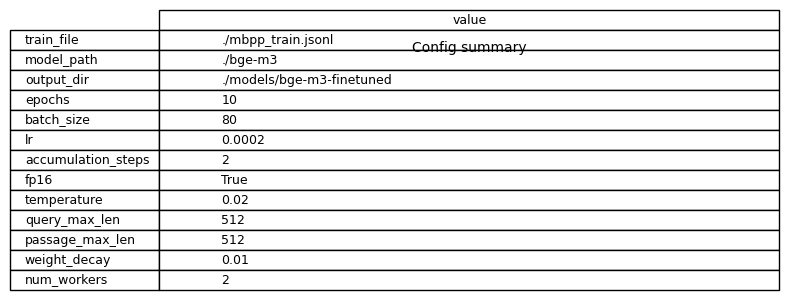

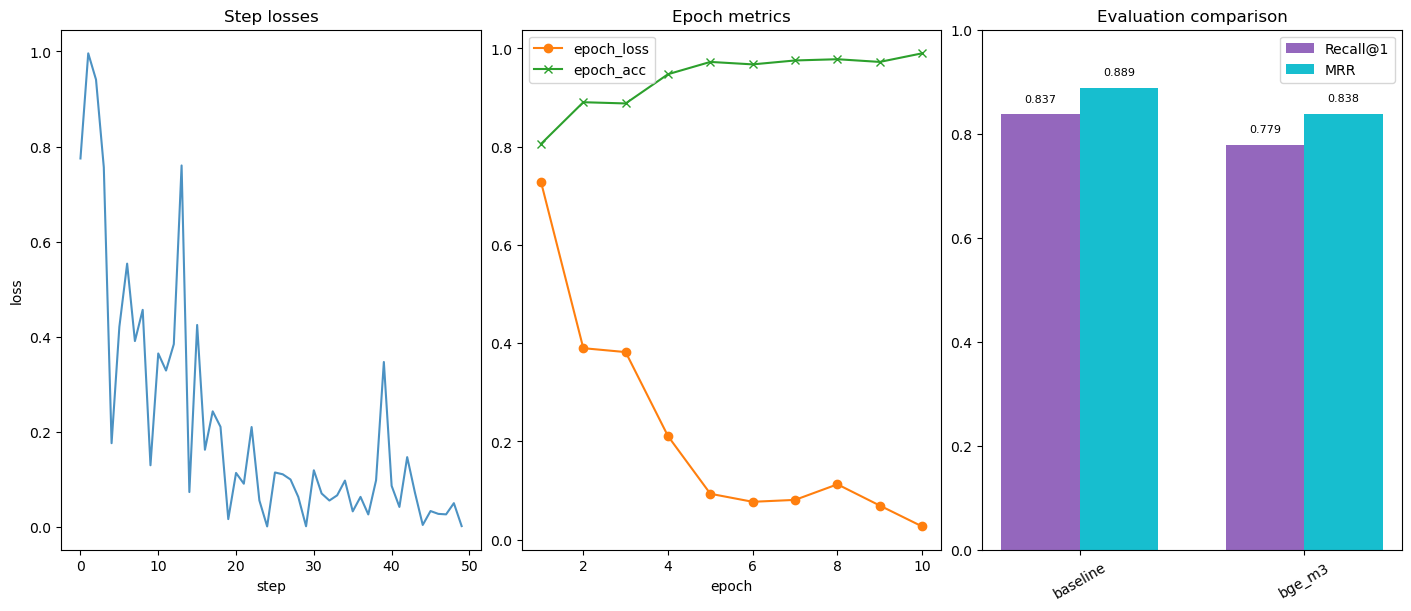

最后 epoch_loss: [0.07709380217711441, 0.08098416924476623, 0.1126649484038353, 0.06944410153664649, 0.026943660387769342]
最后 epoch_acc: [0.9675000190734864, 0.9754762053489685, 0.9779762029647827, 0.9725000143051148, 0.9900000095367432]
最后 5 个 step loss: [0.032571591436862946, 0.026578854769468307, 0.025565046817064285, 0.049150269478559494, 0.000852539436891675]


In [10]:
# 可视化训练历史（training_history.json）
# 从 output_dir 读取 training_history.json 并绘制 step loss / epoch loss / epoch acc，并显示 config 表格
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

out_dir = config.get('output_dir') if isinstance(config, dict) else './models/bge-m3-finetuned'
hist_path = os.path.join(out_dir, 'training_history.json')

if not os.path.exists(hist_path):
    print(f"未找到训练历史文件: {hist_path}\n请先运行训练并确保 training_history.json 已写入 output_dir。")
else:
    with open(hist_path, 'r', encoding='utf-8') as hf:
        hist = json.load(hf)

    step_losses = hist.get('step_losses', [])
    step_accs = hist.get('step_accs', [])
    epoch_idx = hist.get('epoch', [])
    epoch_loss = hist.get('epoch_loss', [])
    epoch_acc = hist.get('epoch_acc', [])

    print('Loaded history from', hist_path)
    print(f"steps: {len(step_losses)}, epochs: {len(epoch_idx)}")

    # 尝试读取评估结果（eval_results.json），格式为 {model_name: {"recall@1":..., "mrr":..., "n":...}, ...}
    eval_path = os.path.join(out_dir, 'eval_results.json')
    eval_results = None
    if os.path.exists(eval_path):
        try:
            with open(eval_path, 'r', encoding='utf-8') as ef:
                eval_results = json.load(ef)
            print('Loaded eval results from', eval_path)
        except Exception as e:
            print('读取 eval_results.json 失败:', e)

    # 显示 config 的重要参数表格（使用 matplotlib table，避免额外依赖）
    try:
        cfg = config if isinstance(config, dict) else {}
        keys = [
            'train_file', 'model_path', 'output_dir', 'epochs', 'batch_size', 'lr',
            'accumulation_steps', 'fp16', 'temperature', 'query_max_len', 'passage_max_len',
            'weight_decay', 'num_workers'
        ]
        rows = []
        for k in keys:
            v = cfg.get(k, None)
            if v is None:
                # 尝试从 globals 中获取替代值
                v = globals().get(k, '')
            rows.append([str(v)])

        fig_table = plt.figure(figsize=(8, max(0.6, 0.18 * len(rows))))
        ax_table = fig_table.add_subplot(111)
        ax_table.axis('off')
        table = ax_table.table(cellText=rows, rowLabels=keys, colLabels=['value'], loc='center', cellLoc='left')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.2)
        plt.title('Config summary', fontsize=10)
        plt.show()
    except Exception as e:
        print('绘制 config 表格失败:', e)

    # 绘图：1 行 3 列（左: step losses, 中: epoch metrics, 右: eval metrics）
    fig = plt.figure(constrained_layout=True, figsize=(14,6))
    gs = fig.add_gridspec(1, 3)

    ax0 = fig.add_subplot(gs[0, 0])
    if step_losses:
        ax0.plot(step_losses, color='tab:blue', alpha=0.8)
        ax0.set_title('Step losses')
        ax0.set_xlabel('step')
        ax0.set_ylabel('loss')
    else:
        ax0.text(0.5, 0.5, 'no step_losses', ha='center', va='center')
        ax0.set_title('Step losses')
        ax0.set_xticks([])
        ax0.set_yticks([])

    ax1 = fig.add_subplot(gs[0, 1])
    if epoch_loss:
        ax1.plot(epoch_idx, epoch_loss, marker='o', label='epoch_loss', color='tab:orange')
    if epoch_acc:
        ax1.plot(epoch_idx, epoch_acc, marker='x', label='epoch_acc', color='tab:green')
    ax1.set_title('Epoch metrics')
    ax1.set_xlabel('epoch')
    ax1.legend()

    ax2 = fig.add_subplot(gs[0, 2])
    if eval_results:
        # 将 eval_results 按模型名排序并绘制 grouped bar（Recall@1 和 MRR）
        model_names = list(eval_results.keys())
        recall_vals = [eval_results[m].get('recall@1', 0.0) for m in model_names]
        mrr_vals = [eval_results[m].get('mrr', 0.0) for m in model_names]
        x = np.arange(len(model_names))
        width = 0.35
        ax2.bar(x - width/2, recall_vals, width, label='Recall@1', color='tab:purple')
        ax2.bar(x + width/2, mrr_vals, width, label='MRR', color='tab:cyan')
        ax2.set_xticks(x)
        ax2.set_xticklabels(model_names, rotation=30)
        ax2.set_ylim(0, 1.0)
        ax2.set_title('Evaluation comparison')
        ax2.legend()
        for i, v in enumerate(recall_vals):
            ax2.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center', va='bottom', fontsize=8)
        for i, v in enumerate(mrr_vals):
            ax2.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center', va='bottom', fontsize=8)
    else:
        ax2.text(0.5, 0.5, 'no eval_results.json', ha='center', va='center')
        ax2.set_title('Evaluation comparison')
        ax2.set_xticks([])
        ax2.set_yticks([])

    plt.show()

    # 额外打印最后几个值便于快速判断
    if epoch_loss:
        print('最后 epoch_loss:', epoch_loss[-5:])
    if epoch_acc:
        print('最后 epoch_acc:', epoch_acc[-5:])
    if step_losses:
        print('最后 5 个 step loss:', step_losses[-5:])
